In [93]:
import numpy as np
from numpy import pi, cos, sin

import matplotlib.pyplot as plt

# Reloading the module
import importlib

import Nodal2D
importlib.reload(Nodal2D)
from Nodal2D import *

import Curve
importlib.reload(Curve)
from Curve import *

import MappingGeometry2D
importlib.reload(MappingGeometry2D)
from MappingGeometry2D import *

## Boundary curves

In [94]:
# Inner and outer radius
a = 1
b = 2

In [95]:
# Creating curve1
# Create a curve class
c1 = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c1.set_parameter_points(point_type="Legendre")
c1.set_BarycentricWeights()
c1.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = a
y_start = 0
x_end = b
y_end = 0


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c1.reparameterization(x, y, x_deri, y_deri, par_range)
c1.cal_derivatives_node()

In [96]:
# Creating curve2
# Create a curve class
c2 = Curve2D(N=20)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c2.set_parameter_points(point_type="Chebyshev")
c2.set_BarycentricWeights()
c2.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = b
y_start = 0
x_end = 0
y_end = b


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c2.reparameterization(x, y, x_deri, y_deri, par_range)
c2.cal_derivatives_node()

In [97]:
# Creating curve3
# Create a curve class
c3 = Curve2D(N=10)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c3.set_parameter_points(point_type="Legendre")
c3.set_BarycentricWeights()
c3.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = 0
y_start = a
x_end = 0
y_end = b


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c3.reparameterization(x, y, x_deri, y_deri, par_range)
c3.cal_derivatives_node()

In [98]:
# Creating curve4
# Create a curve class
c4 = Curve2D(N=20)
# Set boundary parameter points to be Legendre Gauss Lobbato points
c4.set_parameter_points(point_type="Chebyshev")
c4.set_BarycentricWeights()
c4.set_DiffMatrix()

# Parameter range
par_range = np.array([-1,1])
x_start = a
y_start = 0
x_end = 0
y_end = a


def x(t):
    return (x_start * (1-t) + x_end * (1+t))/2

def y(t):
    return (y_start * (1-t) + y_end * (1+t))/2

def x_deri(t):
    return (x_end - x_start)/2

def y_deri(t):
    return (y_end - y_start)/2

c4.reparameterization(x, y, x_deri, y_deri, par_range)
c4.cal_derivatives_node()

In [99]:
print(c1.parameter_points - c1.parameter_points_original)
print(c2.parameter_points - c2.parameter_points_original)
print(c3.parameter_points - c3.parameter_points_original)
print(c4.parameter_points - c4.parameter_points_original)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13509689e-28 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16
 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.13509689e-28 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16
 0.00000000e+00]


In [100]:
curves = [c1, c2, c3, c4]

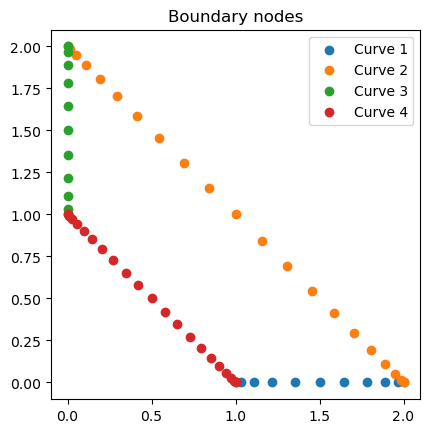

In [101]:
# Testing the geometry
fig, ax = plt.subplots(nrows=1, ncols=1)
for i, c in enumerate(curves):
    ax.scatter(c.x_nodes, c.y_nodes, label='Curve {}'.format(i+1))
ax.legend()
ax.set_title('Boundary nodes')
ax.set_aspect('equal')

## Inner nodes

In [102]:
N = 10
M = 5
nodal2D = Nodal2D(N,M)
nodal2D.cal_nodes(node_type_x="Legendre", node_type_y="Chebyshev")

## Mapping geometry class

In [103]:
mg = MappingGeometry2D(nodal2D=nodal2D, curves=curves)

In [104]:
# Testing the map
xi = np.random.rand() * 2 - 1
eta = np.random.rand() * 2 - 1
print("Physical coordinates (general)", mg.cal_Map(xi, eta))
print("Physical coordinates (quad)", mg.cal_QuadMap(xi, eta))

Physical coordinates (general) [0.39004477 0.84609134]
Physical coordinates (quad) [0.39004477 0.84609134]


In [105]:
# Testing the map derivatives
xi = np.random.rand() * 2 - 1
eta = np.random.rand() * 2 - 1
print("Metrics (general)", mg.cal_MapDerivatives(xi, eta))
print("Metrics (quad)", mg.cal_QuadMapDerivatives(xi, eta))

Metrics (general) (0.3281930191385917, 0.17180698086141472, -0.5597899941918806, 0.5597899941919139)
Metrics (quad) (0.3281930191385875, 0.1718069808614125, -0.5597899941919137, 0.5597899941919137)


In [106]:
mg.nodes_phy_x.shape

(11, 6)

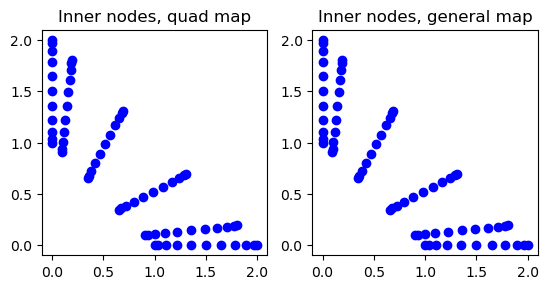

In [107]:
# Testing physical node calculation 
fig, ax = plt.subplots(nrows=1, ncols=2)
Nx = mg.nodal2D.Nx
Ny = mg.nodal2D.Ny

mg.cal_QuadMap_nodes()
for i in range(Nx+1):
    for j in range(Ny+1):
        ax[0].scatter(mg.nodes_phy_x[i,j], mg.nodes_phy_y[i,j], color='blue')
ax[0].set_title('Inner nodes, quad map')
ax[0].set_aspect('equal')

mg.cal_Map_nodes()
for i in range(Nx+1):
    for j in range(Ny+1):
        ax[1].scatter(mg.nodes_phy_x[i,j], mg.nodes_phy_y[i,j], color='blue')
ax[1].set_title('Inner nodes, general map')
ax[1].set_aspect('equal')

In [108]:
# Testing the derivative calculation
mg.cal_QuadMapDerivatives_nodes()
mg.Y_xi

array([[0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ]])

In [109]:
mg.cal_MapDerivatives_nodes()
mg.Y_xi

array([[0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ],
       [0.        , 0.04774575, 0.17274575, 0.32725425, 0.45225425,
        0.5       ]])

In [110]:
mg.cal_Jacobian()
mg.J

array([[0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25824982, 0.25824982, 0.25824982, 0.25824982, 0.25824982,
        0.25824982],
       [0.27693957, 0.27693957, 0.27693957, 0.27693957, 0.27693957,
        0.27693957],
       [0.30434558, 0.30434558, 0.30434558, 0.30434558, 0.30434558,
        0.30434558],
       [0.33803023, 0.33803023, 0.33803023, 0.33803023, 0.33803023,
        0.33803023],
       [0.375     , 0.375     , 0.375     , 0.375     , 0.375     ,
        0.375     ],
       [0.41196977, 0.41196977, 0.41196977, 0.41196977, 0.41196977,
        0.41196977],
       [0.44565442, 0.44565442, 0.44565442, 0.44565442, 0.44565442,
        0.44565442],
       [0.47306043, 0.47306043, 0.47306043, 0.47306043, 0.47306043,
        0.47306043],
       [0.49175018, 0.49175018, 0.49175018, 0.49175018, 0.49175018,
        0.49175018],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       ]])

In [111]:
# Testing the normal vector calculation
mg.cal_normal_vector_nodes()
print("Lower normal vectors\n", mg.norm_vect_lower)
print("Upper normal vectors\n", mg.norm_vect_upper)
print("Left normal vectors\n", mg.norm_vect_left)
print("Right normal vectors\n", mg.norm_vect_right)

Lower normal vectors
 [[-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]
 [-0. -1.]]
Upper normal vectors
 [[-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]
 [-1.  0.]]
Left normal vectors
 [[-0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]
 [-0.70710678 -0.70710678]]
Right normal vectors
 [[0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]
 [0.70710678 0.70710678]]
